第一步：导入包

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris #鸢尾花数据集
from sklearn.model_selection import train_test_split #划分数据集
from sklearn.preprocessing import StandardScaler #标准化
from sklearn.neighbors import KNeighborsClassifier #k-近邻算法

第二步：加载数据

In [2]:
iris=load_iris()

第三步：选择特征值X与目标值Y

In [3]:
x=iris.data
y=iris.target

第四步：数据集划分

In [4]:
#划分训练集与测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [5]:
x_test.shape #查看数组形状

(45, 4)

第五步：数据标准化

In [6]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test) #我们在训练集上拟合之后，已经计算出来了均值与方差，相当于已经有转化的规则，所以测试集不用再fit()

第六步：调用knn算法进行建立模型

In [7]:
knn=KNeighborsClassifier() #n_neighbors默认不写：k值为5
#拟合模型（训练模型）
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

第七步：进行预测

In [8]:
y_predict=knn.predict(x_test)
y_predict,y_test #预测结果与实际对比

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
        0]),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
        0]))

第八步：模型评估

In [9]:
knn.score(x_test,y_test) #准确率

0.9777777777777777

# 混淆矩阵

In [10]:
from sklearn.metrics import confusion_matrix #生产混淆矩阵
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns #画图

In [11]:
#设置中文字体
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=10

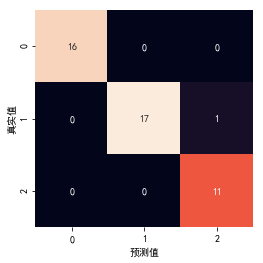

In [12]:
mat=confusion_matrix(y_test,y_predict) #生成混淆矩阵
sns.heatmap(mat,square=True,annot=True,cbar=False) #annot=True加载标签，cbar=False不显示颜色标记
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.show()

# 精确率与召回率

In [13]:
from sklearn.metrics import classification_report #f1评分

In [14]:
print(classification_report(y_test,y_predict,target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.94      0.97        18
  virginica       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



# 交叉验证

二折交叉验证

In [15]:
knn1=KNeighborsClassifier()
knn1.fit(x_test,y_test)
knn1.score(x_train,y_train)

0.9523809523809523

五折交叉验证

In [16]:
from sklearn.model_selection import cross_val_score #交叉验证

In [17]:
cvs=cross_val_score(knn,x,y,cv=5) #cv=划分的份数（几折）
cvs

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [18]:
cvs.mean()

0.9733333333333334

# 调参：网格搜索

In [19]:
from sklearn.model_selection import GridSearchCV #网格搜索交叉验证

In [20]:
param={'n_neighbors':[1,2,3,4,5,6,7]}
gs=GridSearchCV(knn,param_grid=param,cv=10)
gs.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
gs.best_estimator_ #查看选择后最好的模型

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
gs.score(x_test,y_test)

0.9777777777777777

In [23]:
#练习：将数据进行knn建模，把测试集数据进行预测，并且查看评分，如果评分不好，进行分析

In [35]:
df1=pd.read_excel(r"C:\Users\ibf\Desktop\tableau数据\ysceshi.xlsx")
df2=pd.read_excel(r"C:\Users\ibf\Desktop\tableau数据\ysxunlian.xlsx")
df2.columns=[0,1,2]
df1.columns=[0,1,2]
df2.head()

,0,1,2
0,-0.017064,0.000000,1
1,0.153095,0.000001,1
2,-0.258221,0.000004,1
3,-0.033531,0.000001,1
4,-0.002983,-0.000012,1


In [40]:
x_train=df2.iloc[:,0:2]
y_train=df2.iloc[:,2]
x_test=df1.iloc[:,0:2]
y_test=df1.iloc[:,2]

In [41]:
knn2=KNeighborsClassifier()
knn2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
knn2.score(x_test,y_test)

0.4571761658031088

In [43]:
knn2.score(x_train,y_train)

0.6241116423310505